In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import copy

In [2]:
if not os.path.exists('./output'):
    os.makedirs('./output')

original_img = cv2.imread('./images/electronics/BBB.jpg')
grayscale_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
annotated_img = copy.deepcopy(original_img)
cv2.imwrite('./output/0_grayscale.png', grayscale_img)

True

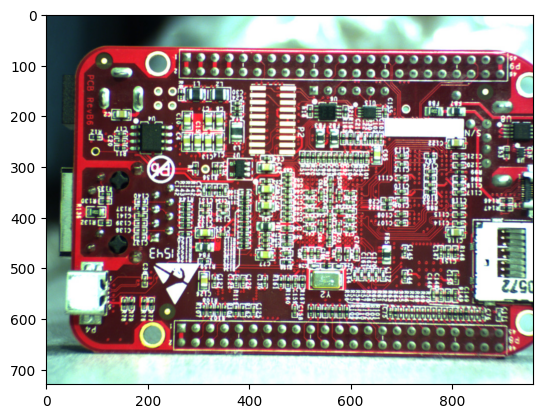

In [3]:
# Display the original image: convert from BGR to RGB because matplotlib expects an RGB image
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

In [4]:
# Create a synthetic template of a 25 pixel bright disk on a black background
fiducial_diameter = 12
template_sizeHW = [round(1.5 * fiducial_diameter), round(1.5 * fiducial_diameter) ]
if template_sizeHW[0]%2 == 0:
    template_sizeHW[0] += 1
if template_sizeHW[1]%2 == 0:
    template_sizeHW[1] += 1
template = np.zeros(template_sizeHW, dtype=np.uint8)
cv2.circle(template, (template_sizeHW[1]//2, template_sizeHW[0]//2), fiducial_diameter//2, 255, thickness=-1)
#cv2.imwrite('./output/template.png', template)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
          0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,
        255,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,   0,   0,   0

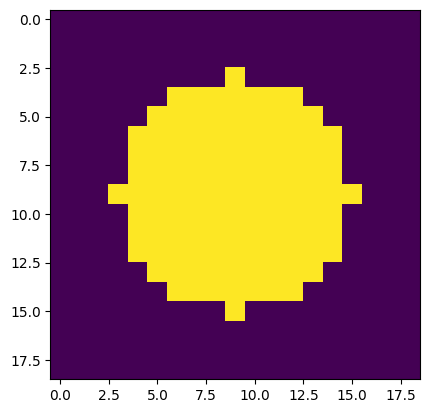

In [5]:
# Display the template
plt.imshow(template)

In [6]:
# Smooth the grayscale image and the template
blur_size = 3
blurred_grayscale_img = cv2.blur(grayscale_img, (blur_size, blur_size))
blurred_template = cv2.blur(template, (blur_size, blur_size))
cv2.imwrite('./output/1_blurred_grayscale.png', blurred_grayscale_img)
cv2.imwrite('./output/2_blurred_template.png', blurred_template)

True

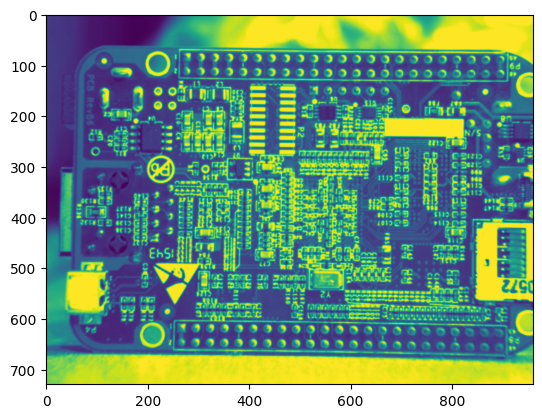

In [7]:
# Display the blurred grayscale image
plt.imshow(blurred_grayscale_img)

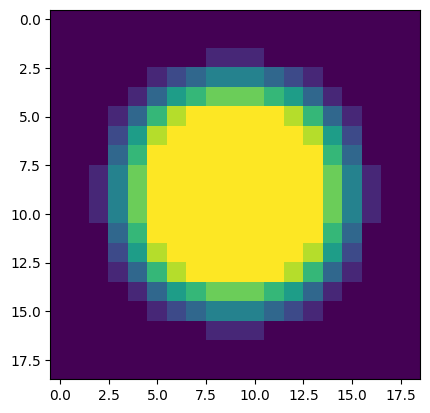

In [8]:
# Display the blurred template
plt.imshow(blurred_template)

In [9]:
# Match the template
match_img = cv2.matchTemplate(blurred_grayscale_img, blurred_template, cv2.TM_CCOEFF_NORMED)
cv2.imwrite('./output/3_match.png', (127 + 127 * match_img).astype(np.uint8))

True

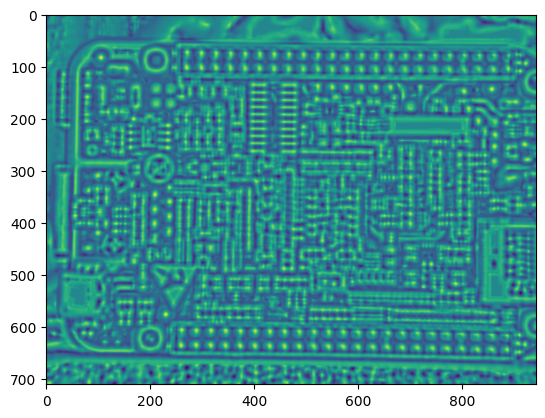

In [10]:
# Display the match image
plt.imshow(match_img)

In [11]:
# Threshold the match image
threshold = 0.93
retval, unpadded_thresholded_match_img = cv2.threshold(match_img, threshold, 255, cv2.THRESH_BINARY)
# Create a padded match image which has the same size as the original image
thresholded_match_img = np.zeros((original_img.shape[0], original_img.shape[1]), dtype=np.uint8)
thresholded_match_img[template_sizeHW[0]//2: template_sizeHW[0]//2 + unpadded_thresholded_match_img.shape[0],
                     template_sizeHW[1]//2: template_sizeHW[1]//2 + unpadded_thresholded_match_img.shape[1]] = unpadded_thresholded_match_img

cv2.imwrite('./output/4_thresholded_match.png', thresholded_match_img)

True

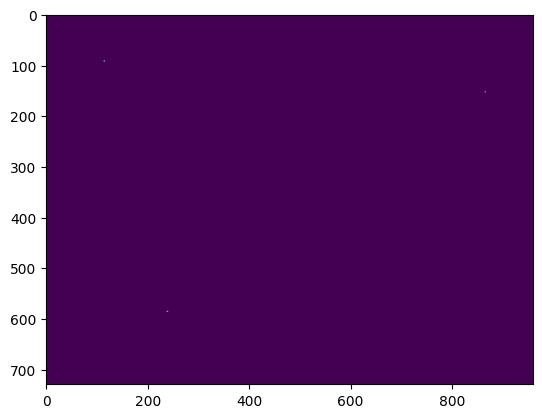

In [12]:
# Display he thresholded match image
plt.imshow(thresholded_match_img)

In [13]:
# Preparation for blob detection
# Create an inverse mask, with a 1-line white border
inverse_mask = 255 - thresholded_match_img
inverse_mask = cv2.copyMakeBorder(inverse_mask, top=1, bottom=1, left=1, right=1, borderType=cv2.BORDER_CONSTANT, value=255)
# Create a SimpleBlobDetector
blob_detector_parameters = cv2.SimpleBlobDetector_Params()
blob_detector_parameters.filterByArea = False
blob_detector_parameters.filterByInertia = False
blob_detector_parameters.filterByConvexity = False
blob_detector_parameters.filterByCircularity = False

blob_detector = cv2.SimpleBlobDetector_create(blob_detector_parameters)

In [14]:
# Detect the blobs
keypoints = blob_detector.detect(inverse_mask)

In [15]:
# Draw the found keypoints in an annotated image
for keypoint in keypoints:
    print(f"keypoint.pt = {keypoint.pt}")
    cv2.circle(annotated_img, (round(keypoint.pt[0]), round(keypoint.pt[1])), 35, (255, 0, 0), thickness=4)

keypoint.pt = (239.78431701660156, 586.62744140625)
keypoint.pt = (866.5, 153.5)
keypoint.pt = (115.37255096435547, 93.21568298339844)


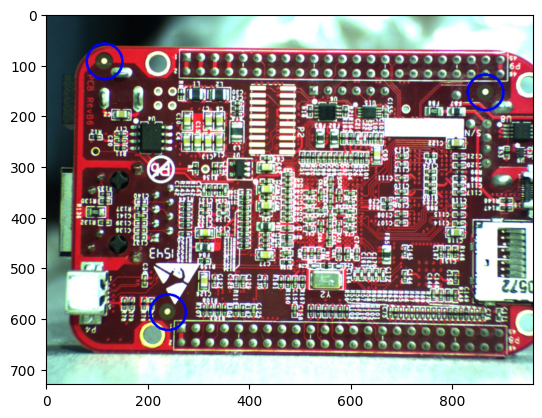

In [16]:
# Show the annotated image
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))